In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function Definitions

In [2]:
def get_pairs(arr):
    _, counts = np.unique(arr, return_counts=True)
    return np.sum(counts * (counts-1) / 2)

In [3]:
def get_l(board):
    return int(np.sqrt(board.shape[0]))

In [4]:
def get_total_pairs(board):
    pairs = 0
    l = get_l(board)
    for i in range(board.shape[0]):
        pairs += get_pairs(board[i])   
    for j in range(board.shape[1]):
        pairs += get_pairs(board[:,j])
    for sqi in range(l):
        for sqj in range(l):
            pairs += get_pairs(board[sqi*l:(sqi+1)*l,sqj*l:(sqj+1)*l])

    return pairs

In [5]:
def get_E(board):
    l = get_l(board)
    pairs = get_total_pairs(board)
    E = pairs / (l**4/2 * (l**2 + 2*l - 3))
    return E

In [6]:
def get_pairs_from_E(E,l):
    return E * (3/2 * (l**4) * ((l**2) - 1))

In [7]:
def metropolis_board(board, Tspace, Mspace):
    current_board=board.copy()
    l = int(np.sqrt(current_board.shape[0]))

    Es = []
    for idx,T in enumerate(Tspace):

        beta = 1/T if T!=0 else None

        for i in range(Mspace[idx]):

            i1,j1 = np.random.randint(0,l**2), np.random.randint(0,l**2)
            i2,j2 = np.random.randint(0,l**2), np.random.randint(0,l**2)
            val1 = current_board[i1,j1]
            val2 = current_board[i2,j2]

            E_before = get_E(current_board)

            current_board[i1,j1] = val2
            current_board[i2,j2] = val1

            E_after = get_E(current_board)

            A=1
            if E_before < E_after:
                if beta != None:
                    A=np.exp(-beta*(E_after-E_before))
                else:
                    A=0

            take = np.random.random() < A
            if not take:
                current_board[i1,j1] = val1
                current_board[i2,j2] = val2
                Es += [E_before]
            else:
                Es += [E_after]
    
    return current_board, np.array(Es)

In [8]:
def plot_alg(Es, Tspace, Mspace, log=False):
    plt.figure(dpi=130)
    ranges = np.cumsum([0]+Mspace)
    for i,T in enumerate(Tspace):
        plt.plot(range(ranges[i],ranges[i+1]),Es[ranges[i]:ranges[i+1]],".",label=f"T={T}")
    plt.xlabel(f"Step Number")
    plt.ylabel(r"E $\left[J\right]$")
    if log:
        plt.xscale('log')
    plt.grid()
    plt.legend()
    plt.show()

In [9]:
def get_board(l):
    return np.repeat(np.arange(1,l**2+1,1).reshape((1,l**2)),l**2,0)

# Sanity check

In [13]:
l=2
b=np.zeros((l**2,l**2))
for i in range(l):
    for j in range(l):
        b[i*l:(i+1)*l,j*l:(j+1)*l]=i*l+j+1

print(b)
print(get_E(b))

[[1. 1. 2. 2.]
 [1. 1. 2. 2.]
 [3. 3. 4. 4.]
 [3. 3. 4. 4.]]
1.0


# Board solutions

## $l=2$

In [14]:
boardl2 = get_board(l=2)
print(boardl2)
print(get_E(boardl2))
print(get_total_pairs(boardl2))

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
0.8
32.0


In [118]:
Tspace_l2_T0 = [0]
Mspace = [300]
boardl2_ground_T0, Es_l2_T0 = metropolis_board(boardl2,Tspace_l2_T0,Mspace) 

Init state E: 0.8, ground state E: 0.0
Init state pairs: 32.0, ground state pairs: 0.0


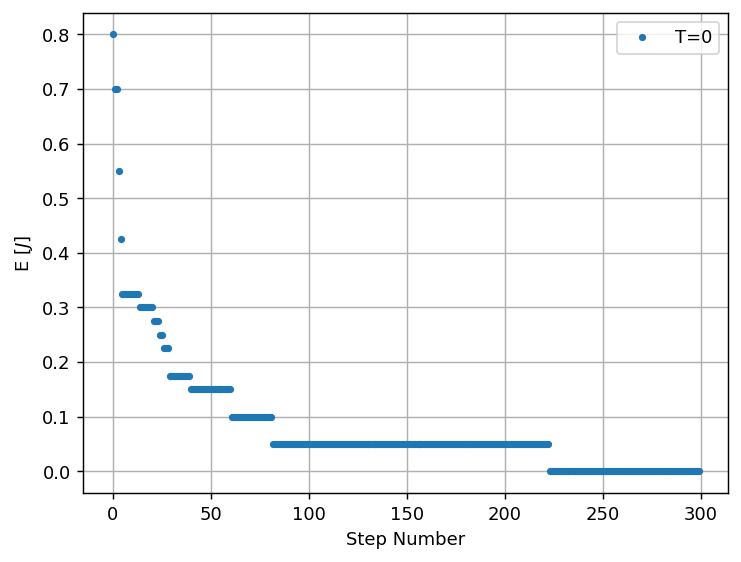

[[3 2 1 4]
 [4 1 3 2]
 [2 3 4 1]
 [1 4 2 3]]


In [119]:
print(f"Init state E: {get_E(boardl2)}, ground state E: {Es_l2_T0[-1]}")
print(f"Init state pairs: {get_total_pairs(boardl2)}, ground state pairs: {get_total_pairs(boardl2_ground_T0)}")
plot_alg(Es_l2_T0, Tspace_l2_T0, Mspace)
print(boardl2_ground_T0)

In [33]:
Tspace_l2_T = [0.05,0.01,0.005]
Mspace = [240,240,240]
boardl2_ground_T, Es_l2_T = metropolis_board(boardl2,Tspace_l2_T,Mspace) 

Init state E: 0.8, ground state E: 0.0
Init state pairs: 32.0, ground state pairs: 0.0


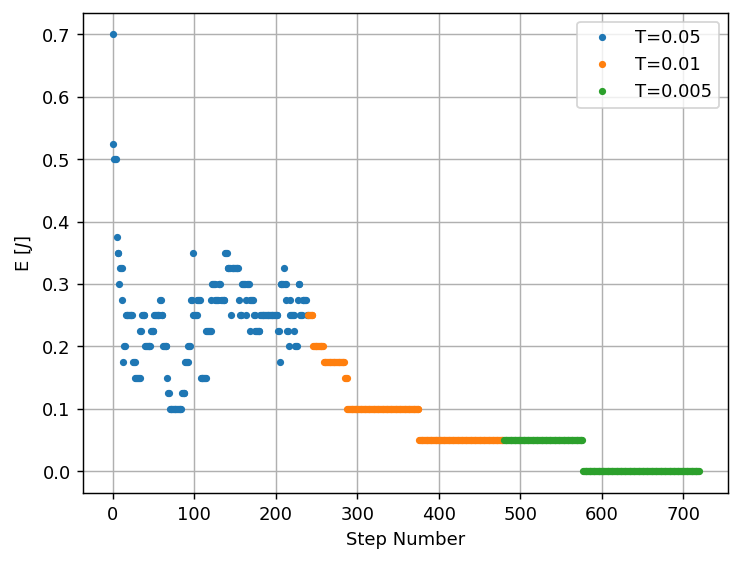

[[2 1 3 4]
 [4 3 2 1]
 [1 2 4 3]
 [3 4 1 2]]


In [34]:
print(f"Init state E: {get_E(boardl2)}, ground state E: {Es_l2_T[-1]}")
print(f"Init state pairs: {get_total_pairs(boardl2)}, ground state pairs: {get_total_pairs(boardl2_ground_T)}")
plot_alg(Es_l2_T, Tspace_l2_T, Mspace)
print(boardl2_ground_T)

## $l=3$

In [35]:
boardl3 = get_board(l=3)
print(boardl3)
print(get_E(boardl3))
print(get_total_pairs(boardl3))

[[1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]]
0.8333333333333334
405.0


In [110]:
Tspace_l3_T0 = [0]
Mspace = [25000]
boardl3_ground_T0, Es_l3_T0 = metropolis_board(boardl3,Tspace_l3_T0,Mspace) 

Init state E: 0.8333333333333334, ground state E: 0.00411522633744856
Init state pairs: 405.0, ground state pairs: 2.0


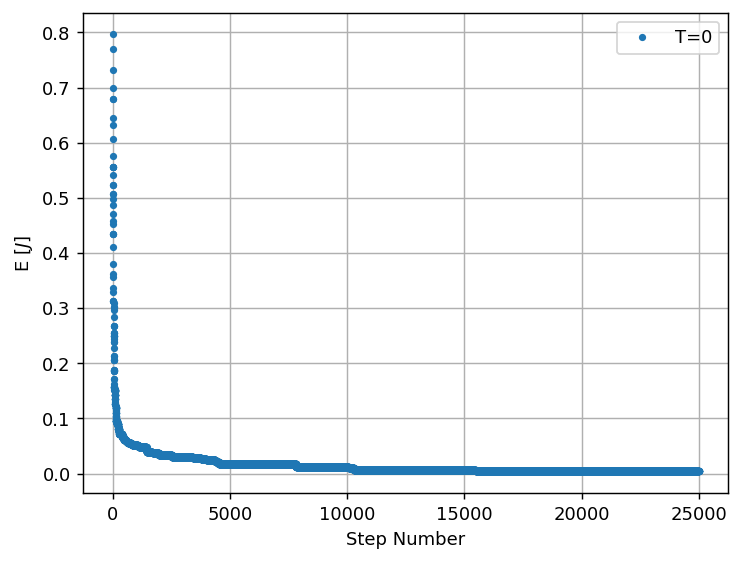

[[2 3 4 6 7 5 1 8 9]
 [6 7 9 1 2 8 4 3 5]
 [1 8 5 4 9 3 7 2 6]
 [8 9 7 3 4 1 5 6 2]
 [3 2 1 6 5 7 9 4 8]
 [4 5 6 8 2 9 3 1 7]
 [5 6 3 7 8 4 2 9 1]
 [7 4 2 9 1 6 8 5 3]
 [9 1 8 5 3 2 6 7 4]]


In [111]:
print(f"Init state E: {get_E(boardl3)}, ground state E: {Es_l3_T0[-1]}")
print(f"Init state pairs: {get_total_pairs(boardl3)}, ground state pairs: {get_total_pairs(boardl3_ground_T0)}")
plot_alg(Es_l3_T0, Tspace_l3_T0,Mspace)
print(boardl3_ground_T0)

In [108]:
Tspace_l3_T = [0.003,0.001,1e-4,1e-5]
Mspace =[6500,6500,6500,6500]
boardl3_ground_T, Es_l3_T = metropolis_board(boardl3,Tspace_l3_T,Mspace) 

Init state E: 0.8333333333333334, ground state E: 0.0
Init state pairs: 405.0, ground state pairs: 0.0


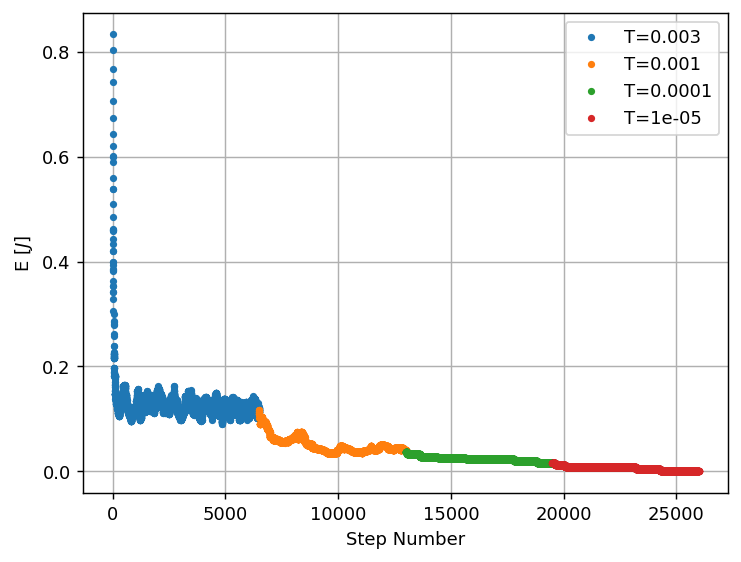

[[5 8 1 2 4 3 7 9 6]
 [7 3 6 5 1 9 4 8 2]
 [4 2 9 8 7 6 1 5 3]
 [6 7 5 9 8 4 2 3 1]
 [2 1 3 6 5 7 8 4 9]
 [9 4 8 1 3 2 6 7 5]
 [3 9 4 7 2 1 5 6 8]
 [1 5 7 3 6 8 9 2 4]
 [8 6 2 4 9 5 3 1 7]]


In [109]:
print(f"Init state E: {get_E(boardl3)}, ground state E: {Es_l3_T[-1]}")
print(f"Init state pairs: {get_total_pairs(boardl3)}, ground state pairs: {get_total_pairs(boardl3_ground_T)}")
plot_alg(Es_l3_T, Tspace_l3_T,Mspace)
print(boardl3_ground_T)

## $l=4$

In [121]:
boardl4 = get_board(l=4)
print(boardl4)
print(get_E(boardl4))
print(get_total_pairs(boardl4))

[[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]]
0.8571428571428571
2304.0


In [132]:
Tspace_l4_T0 = [0]
Mspace=[65000]
boardl4_ground_T0, Es_l4_T0 = metropolis_board(boardl4,Tspace_l4_T0,Mspace) 

Init state E: 0.8571428571428571, ground state E: 0.008928571428571428
Init state pairs: 2304.0, ground state pairs: 24.0


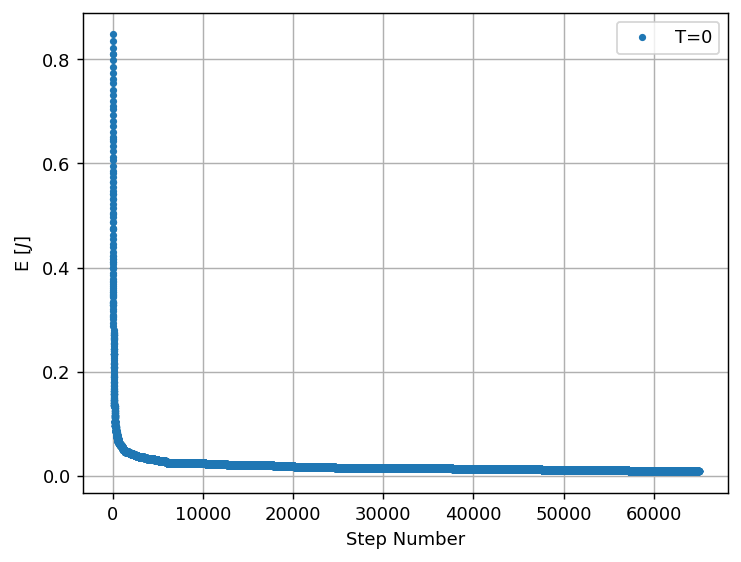

[[12  8 10  4 16 11  2  6  5  7  3  1 14 15  9  4]
 [ 3  2  1 14 10 15  5  4 16 11  9 12  6  8 13  7]
 [ 7 11  5  6  9  8 12  3  4 13 15 14 16 10  1  2]
 [ 9 13 15 16  1  7 14  1  6 10  2  8 11 12  3  5]
 [ 5  6  3 11  2 16  4  8  1 15 14 13 12  7 10  9]
 [13  4  8  1  7 16  9 14 12  2 10  5  3  6 15 11]
 [15 14 16 12  6  3 10  2 11  9  7  4  5  1  8 13]
 [10  7  9  5 13 12  1 11  8  3  6 15  2 14  4 16]
 [16 13  4 15  9 14  8 10  3  1  5 11  7  2  6 12]
 [ 5  1  6  7  3 13  2 16 15 12  4 10  9 11 14  8]
 [14 12  2  3  4  6 11 15  7 16  8  9  1 13  5 10]
 [11 10  9  8  5  1  7 12 14  6 13  2  4  3 16 15]
 [ 6 15 11  2  8 14  3  9 13  4 12  7 10 16 12  1]
 [ 1  5  7 10 15  4  6 13 11  5 16  3  8  9  2 14]
 [ 4  3 12  9 11 10 13 16  2  8  1 14 15  5  7  6]
 [ 8 16 14 13 12  2  5  7 10  9 15  6 13  4 11  3]]


In [133]:
print(f"Init state E: {get_E(boardl4)}, ground state E: {Es_l4_T0[-1]}")
print(f"Init state pairs: {get_total_pairs(boardl4)}, ground state pairs: {get_total_pairs(boardl4_ground_T0)}")
plot_alg(Es_l4_T0, Tspace_l4_T0,Mspace)
print(boardl4_ground_T0)

In [130]:
Tspace_l4_T = [1e-3,1e-4,1e-5,1e-6]
Mspace_l4_T = [5000,20000,20000,20000]
boardl4_ground_T, Es_l4_T = metropolis_board(boardl4,Tspace_l4_T,Mspace=Mspace_l4_T) 

Init state E: 0.8571428571428571, ground state E: 0.0078125
Init state pairs: 2304.0, ground state pairs: 21.0


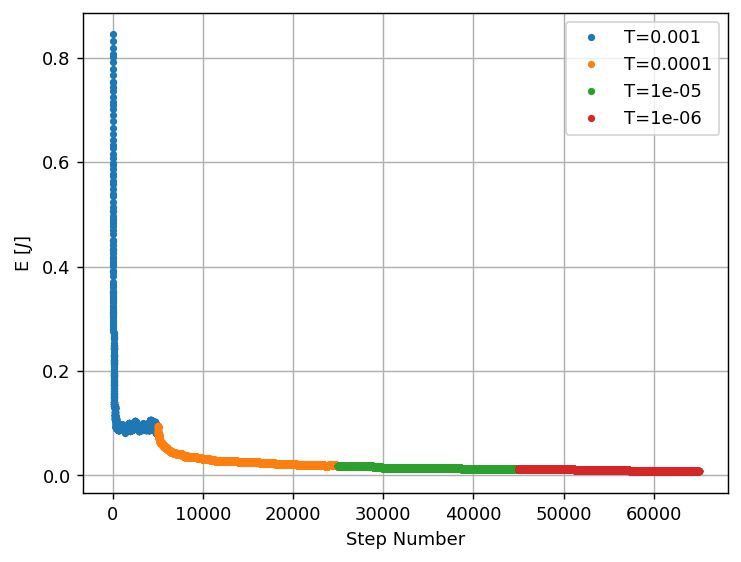

[[ 4  7  6 14 10  9  5  8  2  3  6 12 13 11 16 15]
 [12 16 10  2  1  6 11 14 15  7  8 13  9  5  4  3]
 [ 9 13  8 15  3 15  2 13 14  4  5 11 10 12  1  7]
 [ 5  1 11  3 16  4  7 12 10  9  1  2 14  6  8 13]
 [ 8 15  5 13  6  2  3  1 11 16  4 14  7 10 12  9]
 [ 6 11 16  7 12 14  4 16  3  5  9 15  8  1  2 13]
 [ 3  9  1  4 11 10  8 15 12 10  2  6 16 14  5  4]
 [ 2 10 14 12  7  5 13  9  7  8 16  1  3 15 11  6]
 [16  8  9  6 15  7  1  3  4 14 12 10 11  2 13  5]
 [10  3  4  1  9 16 14  5  6 13 11  7 15  8  9 12]
 [ 7 14 12 11 13  8 10  2  5  1 15  9  6  4  3 16]
 [13  2 15  5  4 12  6 11  8  2 16  3  1  7 14 10]
 [11  5 13 10  8  3  9  7  1  2  3  4 12 16  6 14]
 [15  4  2  8 14 13 12  6 16 11 10  5  2  9  7  1]
 [14 12  3  9  5  1 16 10 15  6  7  8  4 13 15 11]
 [ 1  6  7 16  2 11 15  4 13 12 14  9  5  3 10  8]]


In [131]:
print(f"Init state E: {get_E(boardl4)}, ground state E: {Es_l4_T[-1]}")
print(f"Init state pairs: {get_total_pairs(boardl4)}, ground state pairs: {get_total_pairs(boardl4_ground_T)}")
plot_alg(Es_l4_T, Tspace_l4_T, Mspace_l4_T)
print(boardl4_ground_T)